In [2]:
import joblib

preprocessor = joblib.load("models/preprocessor.pkl")
X_train_proc, X_test_proc, y_train, y_test = joblib.load("models/splits.pkl")

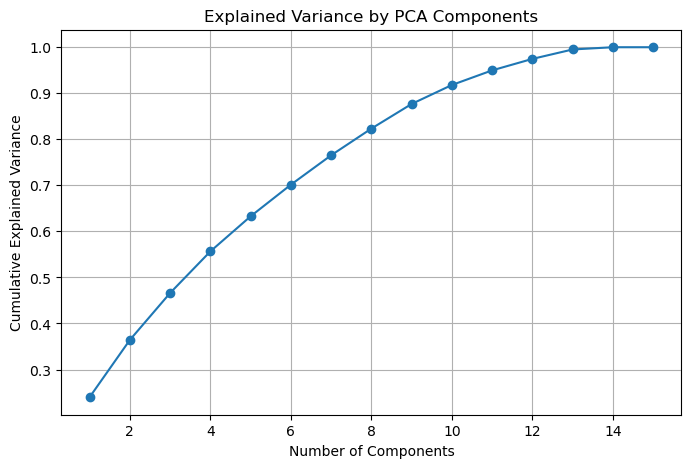

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train_proc.toarray() if hasattr(X_train_proc, "toarray") else X_train_proc)

explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var.cumsum(), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

In [5]:
import numpy as np
n_components = np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.95) + 1

print("Number of components covering 95% of variance =", n_components)

pca_final = PCA(n_components=n_components, random_state=42)
X_train_pca = pca_final.fit_transform(X_train_proc.toarray() if hasattr(X_train_proc, "toarray") else X_train_proc)
X_test_pca = pca_final.transform(X_test_proc.toarray() if hasattr(X_test_proc, "toarray") else X_test_proc)

print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)

Number of components covering 95% of variance = 12
X_train_pca shape: (242, 12)
X_test_pca shape: (61, 12)


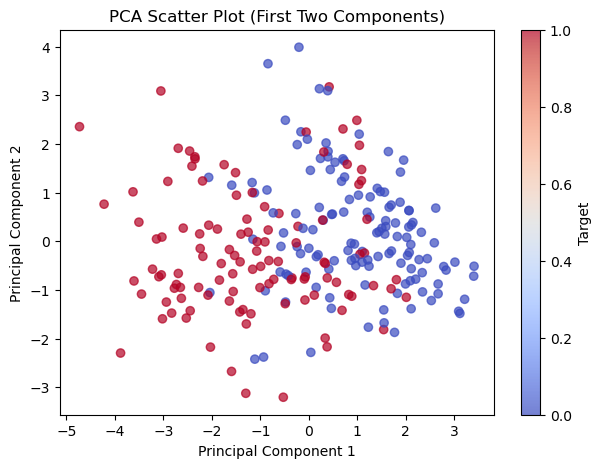

In [7]:
if X_train_pca.shape[1] >= 2:
    plt.figure(figsize=(7,5))
    plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap="coolwarm", alpha=0.7)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Scatter Plot (First Two Components)")
    plt.colorbar(label="Target")
    plt.show()
else:
    print("Number of components is less than 2, cannot plot scatter plot")